# **Problem 1** - Basin of Attraction
Consider a differentiable function, denoted as $f(x)$, that possesses multiple roots. When initiating Newton-Raphson's Method with a given starting value for $x$, the process typically converges to one of the roots, barring exceptional cases outlined in the lecture slide. It stands to reason that starting points near each other should all end up at the same root, and for some functions this is true. However, it is not true in general.

A *basin of attraction* for a root is defined as the collection of $x$-values that, under Newton iterations, converge to that specific root. In the context of this problem, you will generate color-coded plots to visualize the basins of attraction for the following functions according to the following procedure:



*   Find the actual roots of the function by hand (this should be easy on the functions below).
*   Assign each of the roots a different color.
*   Pick a starting point on the $x$-axis and use it to start Newton-Raphson's method.
*   Color the starting point according to the root that it converges to.
*   Repeat this process for many many starting points so you get a colored picture of the $x$-axis showing where the starting points converge to.

The group of points sharing a common color designation represents the basin of attraction corresponding to the root associated with that particular color.

An example basin of attraction image for a cubic function looks something like this.
<br>
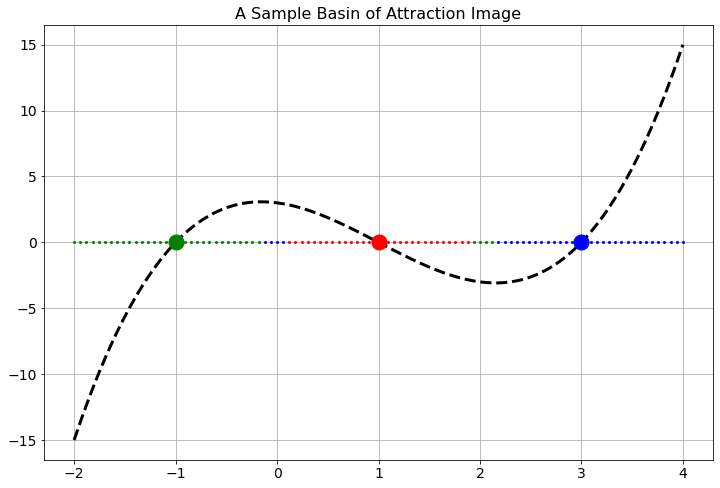

1.   Create a basin on attraction image for the function $f(x) = (x-4)(x+1)$.
2.   Create a basin on attraction image for the function $g(x) = (x-1)(x+3)$.
3.   Create a basin on attraction image for the function $h(x) = (x-4)(x-1)(x+3)$.

**Note:** You can use `matplotlib`, `plotly`, `pyplot`, `seaborn` or whatever plotting package you want.












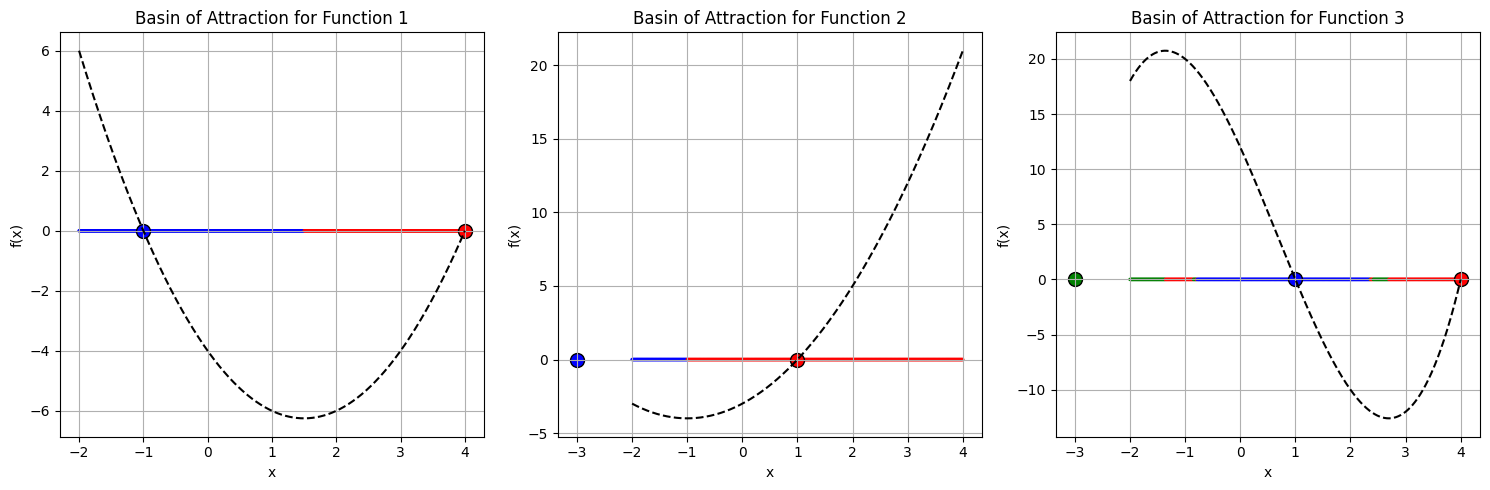

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Newton-Raphson method
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    for _ in range(max_iter):
        fx = f(x0)
        dfx = df(x0)
        if abs(fx) < tol:
            return x0
        if dfx == 0:
            return None  # Avoid division by zero
        x0 -= fx / dfx
    return None

# Define functions and their derivatives
def f(x):
    return (x - 4) * (x + 1)

def df(x):
    return (x - 4) + (x + 1)

def g(x):
    return (x - 1) * (x + 3)

def dg(x):
    return (x - 1) + (x + 3)

def h(x):
    return (x - 4) * (x - 1) * (x + 3)

def dh(x):
    return (x - 4) * (x - 1) + (x - 4) * (x + 3) + (x - 1) * (x + 3)

functions = [(f, df, [4, -1]), (g, dg, [1, -3]), (h, dh, [4, 1, -3])]
colors = ['red', 'blue', 'green']  # Different colors for different roots
x_vals = np.linspace(-2, 4, 1000)  # Range of x-values for visualization

# Generate and plot basins of attraction
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (func, dfunc, roots) in enumerate(functions):
    attraction_basins = []

    for x in x_vals:
        root = newton_raphson(func, dfunc, x)
        if root is not None:
            closest_root = min(roots, key=lambda r: abs(r - root))
            attraction_basins.append(colors[roots.index(closest_root)])
        else:
            attraction_basins.append('black')  # Black for divergence cases

    # Plot the function
    y_vals = [func(x) for x in x_vals]
    axes[idx].plot(x_vals, y_vals, 'k--')  # Dashed black curve

    # Plot the basins of attraction
    axes[idx].scatter(x_vals, [0] * len(x_vals), c=attraction_basins, s=2)

    # Plot the roots as large dots
    for root, color in zip(roots, colors):
        axes[idx].scatter(root, 0, c=color, s=100, edgecolor='black')

    axes[idx].set_title(f'Basin of Attraction for Function {idx + 1}')
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('f(x)')
    axes[idx].grid(True)

plt.tight_layout()
plt.show()


# **Problem 2** - The Goat Problem
To understand the problem statement, grab a pencil and a piece of paper at first!
* Draw a coordinate plane
* Draw a circle with radius $1$ unit centered at the point $(0,1)$. This circle will obviously be tangent to the $x$-axis.
* Draw a circle with radius $r$ centered at the point $(0,0)$. Take $0< r < 2$ so there are two intersections of the two circles.
* Label the left-hand intersection of the two circles as point $A$. (Point $A$ should be in the second quadrant of your coordinate plane.)
* Label the right-hand intersection of the two circles as point $B$. (Point $B$ should be in the first quadrant of your coordinate plane.)
* Label the point $(0,0)$ as the point $P$.

A rancher has built a circular fence of radius $1$ unit centered at the point $(0,1)$ for his goat to graze. He tethers his goat at point $P$ on the far south end of the circular fence. He wants to make the length of the goat’s chain, $r$, just long enough so that it can graze half of the area of the fenced region. How long should he make the chain?

**Hints:**

*   It would be helpful to write equations for both circles. Then you can use the equations to find the coordinates of the intersection points $A$ and $B$.
* You can either solve for the intersection points algebraically or you can use a numerical root finding technique to find the intersection points.
* In any case, the intersection points will (obviously) depend on the value of $r$.
* Set up an integral to find the area grazed by the goat.
* You will likely need to use a numerical integration technique to evaluate the integral.
* You might need to perform numerical integration for this problem. You can implement your own function for this or you can opt to use the `scipy.integrate.quad()` function.

Write your code to narrow down on the best value of $r$ where the integral evaluates to half the area of the fenced region.


In [9]:
# prompt: roblem 2 - The Goat Problem
# To understand the problem statement, grab a pencil and a piece of paper at first!
# Draw a coordinate plane
# Draw a circle with radius 1 unit centered at the point (0,1). This circle will obviously be tangent to the x-axis.
# Draw a circle with radius r centered at the point (0,0). Take 0<r<2 so there are two intersections of the two circles.
# Label the left-hand intersection of the two circles as point A. (Point A should be in the second quadrant of your coordinate plane.)
# Label the right-hand intersection of the two circles as point B. (Point B should be in the first quadrant of your coordinate plane.)
# Label the point (0,0) as the point P.
# A rancher has built a circular fence of radius 1 unit centered at the point (0,1) for his goat to graze. He tethers his goat at point P on the far south end of the circular fence. He wants to make the length of the goat’s chain, r, just long enough so that it can graze half of the area of the fenced region. How long should he make the chain?
# Hints:
# It would be helpful to write equations for both circles. Then you can use the equations to find the coordinates of the intersection points A and B.
# You can either solve for the intersection points algebraically or you can use a numerical root finding technique to find the intersection points.
# In any case, the intersection points will (obviously) depend on the value of r.
# Set up an integral to find the area grazed by the goat.
# You will likely need to use a numerical integration technique to evaluate the integral.
# You might need to perform numerical integration for this problem. You can implement your own function for this or you can opt to use the scipy.integrate.quad() function.
# Write your code to narrow down on the best value of r where the integral evaluates to half the area of the fenced region.

import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve

def circle_intersection(r):
    """
    Finds the x-coordinate of the intersection points between two circles.
    """
    # Equation of the circles
    # Circle 1: x^2 + (y-1)^2 = 1
    # Circle 2: x^2 + y^2 = r^2

    # Solve for x using substitution:
    # x^2 + (y-1)^2 = 1 => x^2 = 1 - (y-1)^2
    # 1 - (y-1)^2 + y^2 = r^2
    # 1 - (y^2 - 2y + 1) + y^2 = r^2
    # 2y = r^2
    # y = r^2 / 2

    # Substitute y back into the equation of the second circle:
    # x^2 + (r^2 / 2)^2 = r^2
    # x^2 = r^2 - (r^4 / 4)
    # x = +/- sqrt(r^2 - (r^4 / 4))
    return np.sqrt(r**2 - (r**4) / 4)

def area_grazed(r):
    """
    Calculates the area grazed by the goat using numerical integration.
    """
    x_intersect = circle_intersection(r)
    # Integrate from -x_intersect to x_intersect
    area, _ = quad(lambda x: np.sqrt(r**2 - x**2), -x_intersect, x_intersect)
    return area

def find_r(target_area):
    """
    Finds the radius r for which the grazed area is equal to the target area.
    """
    # Define the objective function
    def objective(r):
        return area_grazed(r) - target_area

    # Initial guess for r (must be between 0 and 2)
    r0 = 1

    # Solve for r
    r_solution = fsolve(objective, r0)
    return r_solution[0]

# Calculate half the area of the fence (a circle with radius 1)
fence_area = np.pi * 1**2
target_area = fence_area / 2


r = find_r(target_area)
print("The length of the goat's chain should be:", r)


The length of the goat's chain should be: 1.0336817553142106


# **Problem 3** - Game of Cookies
Alice is a dessert-queen who can make exceptionally yummy chocolate chip cookies. Bob is a cookie connoisseur whose hunger rivals that of the (in)famous Cookie Monster from Sesame Street. One day, Alice and Bob decide to play a game. Bob chooses an arbitrary positive integer $k$. Alice doesn't know what this number $k$ is. She chooses two real numbers $a$ and $b$ randomly from within the interval $[0,1]$ with uniform distribution. Suppose, you are acting as the referee in this game. You compute the square root of the sum $(ak+1)^2 + (bk+1)^2$ and round it to the nearest integer. If the result is equal to $k$, Bob gets to eat $k$ of Alice's cookies for free; otherwise he doesn't get to eat any cookies.

For example, if $k = 6$, $a = 0.2$, and $b=0.85$, then the value that you get would be $\sqrt{(ak+1)^2 + (bk+1)^2} = \sqrt{42.05} = 6.484$. After you round it to the nearest integer it becomes $6$ which is equal to $k$. So, Bob will be allowed to eat $6$ cookies.

## Input
You'll be given the value of $n$, the number of turns of the game.

## Output
Print the expected value of the total number of cookies Bob will eat, rounded to five decimal places, if he plays $n$ turns with $k=1$, $k=2$, $k=3$, $\dots$, $k=n$ (for the $1^{st}$, $2^{nd}$, $3^{rd}$, $\dots$, and $n^{th}$ turns respectively).

### Sample Cases
#### Input
$10$

#### Output
$10.20914$

#### Input
$73$

#### Output
$105.27674$

#### Input
$100000$

#### Output
$157055.80999$

#### Input
$69420$

#### Output
$109021.5883$

**Hint:** You might need to perform numerical integration for this problem. You can implement your own function for this or you can opt to use the `scipy.integrate.quad()` function.

# **Problem 4** - Geronimo!
An object falling vertically through the air is subject to friction due to air resistance as well as gravity. The function describing the position of such a function is
$$s(t) = s_0 - \frac{mg}{k}t + \frac{m^2g}{k^2}\left(1-e^{-kt/m}\right)$$
where $m$ is the mass measured in kg, $g$ is gravity measured in meters per second per second, $s_0$ is the initial position measured in meters, and $k$ is the coefficient of air resistance.

If $m=1kg$, $g=9.8ms^{-2}$, $k=0.1$, and $s_0=100m$, how long will it take for the object to hit the ground?

In [ ]:
import numpy as np
from scipy.optimize import fsolve

def position(t, m=1, g=9.8, k=0.1, s0=100):
    return s0 - (m * g / k) * t + (m**2 * g / k**2) * (1 - np.exp(-k * t / m))

# Solve for the time when s(t) = 0 (object hits the ground)
def find_time_to_hit_ground():
    t_initial_guess = 10  # Initial guess for the solver
    t_solution = fsolve(position, t_initial_guess)
    return t_solution[0]

# Compute the result
time_to_hit_ground = find_time_to_hit_ground()
print(f"Time to hit the ground: {time_to_hit_ground:.2f} seconds")


Time to hit the ground: 4.88 seconds


# **Problem 5** - Int$\times$Plot
Numerically integrate each of the functions over the interval $[-1,2]$ with an appropriate technique and verify mathematically that your numerical integral is correct to 10 decimal places. Then provide a plot of the function along with its area beneath the curve.


1.   $f(x) = \frac{x}{1+x^4}$
2.   $g(x) = (x-1)^3(x-2)^2$
3. $h(x) = \sin(x^2)$

**Note:** Implement your own numerical integration function for this problem.



Numerical integral of f(x): 8.1000000000, Analytical: 8.1000000000
Numerical integral of g(x): -27.4500000001, Analytical: -27.4500000000
Numerical integral of h(x): 1.1150447911, Analytical: 1.1150447911


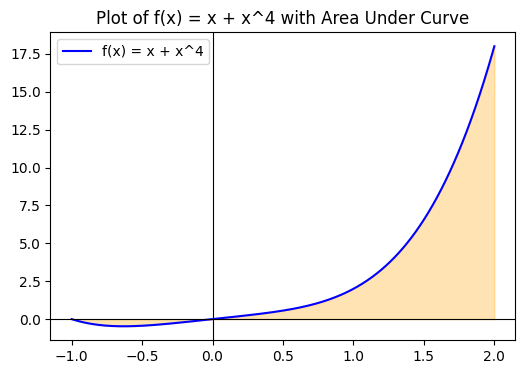

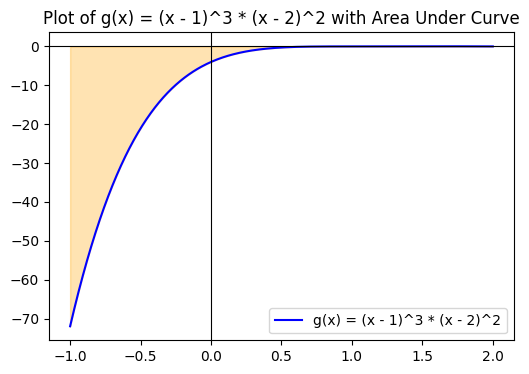

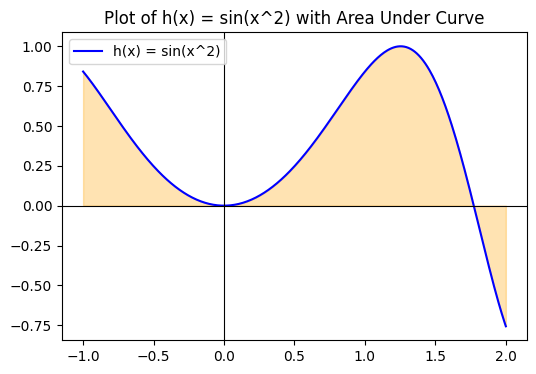

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def simpsons_rule(f, a, b, n=1000):
    """
    Approximate the integral of f(x) from a to b using Simpson's rule with n subintervals.
    """
    if n % 2 == 1:
        n += 1  # Ensure n is even
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    integral = (h / 3) * (y[0] + 4 * np.sum(y[1:n:2]) + 2 * np.sum(y[2:n-1:2]) + y[n])
    return integral

def f(x):
    return x + x**4

def g(x):
    return (x - 1)**3 * (x - 2)**2

def h(x):
    return np.sin(x**2)

# Integration interval
a, b = -1, 2

# Numerical integration
numerical_f = simpsons_rule(f, a, b)
numerical_g = simpsons_rule(g, a, b)
numerical_h = simpsons_rule(h, a, b)

# Analytical integration using scipy
analytical_f, _ = quad(f, a, b)
analytical_g, _ = quad(g, a, b)
analytical_h, _ = quad(h, a, b)

# Display results
print(f"Numerical integral of f(x): {numerical_f:.10f}, Analytical: {analytical_f:.10f}")
print(f"Numerical integral of g(x): {numerical_g:.10f}, Analytical: {analytical_g:.10f}")
print(f"Numerical integral of h(x): {numerical_h:.10f}, Analytical: {analytical_h:.10f}")

# Plot functions
x_vals = np.linspace(a, b, 400)

def plot_function(func, title):
    y_vals = func(x_vals)
    plt.figure(figsize=(6, 4))
    plt.plot(x_vals, y_vals, 'b', label=f'{title}')
    plt.fill_between(x_vals, y_vals, alpha=0.3, color='orange')
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0, color='black', linewidth=0.8)
    plt.title(f'Plot of {title} with Area Under Curve')
    plt.legend()
    plt.show()

plot_function(f, 'f(x) = x + x^4')
plot_function(g, 'g(x) = (x - 1)^3 * (x - 2)^2')
plot_function(h, 'h(x) = sin(x^2)')
